# Wie definiert man Klassen?
### Objekte in Python

In [1]:
liste = [1, 2, 3, 4]
liste.remove(2)
print(liste)

[1, 3, 4]


In [2]:
zahl = 2
# zahl.remove(2)
# Fehlermeldung

### Klassen

In [3]:
class Perzeptron:
    trainiert = False

test = Perzeptron()
print(test.trainiert)

In [5]:
class Perzeptron:
    trainiert = False
    def __init__(self, max_epochs):
        trainiert = True
        self.max_epochs = max_epochs

In [6]:
test2 = Perzeptron(100)
test3 = Perzeptron(200)
print(test2.max_epochs)
print(test3.max_epochs)

100
200


In [7]:
print(test2.trainiert)
print(test3.trainiert)

False
False


In [ ]:
class Perzeptron:

    def __init__(self, max_epochs):
        self.trainiert = False
        self.max_epochs = max_epochs

## Perzeptron
### Daten vorbereiten

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
feature = np.array([[37.92655435, 23.90101111],
                    [35.88942857, 22.73639281],
                    [29.49674574, 21.42168559],
                    [32.48016326, 21.7340484 ],
                    [38.00676226, 24.37202837],
                    [30.73073988, 22.69832608],
                    [35.93672343, 21.07445241],
                    [38.65212459, 20.57099727],
                    [35.52041768, 21.74519457],
                    [37.69535497, 20.33073640],
                    [33.00699292, 22.57063861],
                    [33.73140934, 23.81730782],
                    [43.85053380, 20.05153803],
                    [32.95555986, 24.12153986],
                    [36.38192916, 19.20280266],
                    [36.54270168, 20.45388966],
                    [33.08246118, 22.20524015],
                    [31.76866280, 21.01201139],
                    [42.24260825, 20.44394610],
                    [29.04450264, 22.46633771],
                    [30.04284328, 21.54561621],
                    [18.95626707, 19.66737753],
                    [18.60176718, 17.74023009],
                    [12.85314993, 18.42746953],
                    [28.62450072, 17.94781944],
                    [21.00655655, 19.33438286],
                    [17.33580556, 18.81696459],
                    [31.17129195, 17.23625014],
                    [19.36176482, 20.67772798],
                    [27.26581705, 16.71312863],
                    [21.19107828, 19.00673617],
                    [19.08131597, 15.24401994],
                    [26.69761925, 17.05937466],
                    [4.44136559 , 3.52432493 ],
                    [10.26395607, 1.07729281 ],
                    [7.39058439 , 3.44234423 ],
                    [4.23565118 , 4.28840232 ],
                    [3.87875761 , 5.12407692 ],
                    [15.12959925, 6.26045879 ],
                    [5.93041263 , 1.70841905 ],
                    [4.25054779 , 5.01371294 ],
                    [2.15139117 , 4.16668657 ],
                    [2.38283228 , 3.83347914 ]])

feature = np.concatenate((feature, np.ones(43).reshape(43,1)), axis=1)
print(feature[0:3,:])

[[37.92655435 23.90101111  1.        ]
 [35.88942857 22.73639281  1.        ]
 [29.49674574 21.42168559  1.        ]]


In [10]:
labels = np.concatenate((np.ones(21), np.zeros(22)))
print(labels.shape)

(43,)


## Perzptron als Klasse

In [11]:
class Perzeptron():

    def __init__(self, max_epochs):
        self.w = None
        self.skalierungsfaktor = None
        self.trainiert = False
        self.max_epochs = max_epochs
        self.fehler = np.zeros(max_epochs)

    def perzeptron(self, x):
        if self.trainiert: x /= self.skalierungsfaktor
        return 1 if np.dot(self.w, x) > 0 else 0

    def lernschritt(self, feature, labels):
        # 1. Daten Normalisieren
        self.skalierungsfaktor = np.max(feature, 0)
        feature /= self.skalierungsfaktor
        # 2. Training
        iter = 0
        self.w = np.random.rand(feature.shape[1])
        while iter < self.max_epochs:
            for x, label in zip(feature, labels):
                delta = label - self.perzeptron(x)
                if delta != 0: # falsch klassifiziert
                    self.fehler[iter] += 1
                    self.w += (delta * x)    
            if self.fehler[iter] == 0:
                self.trainiert = True
                self.visualize(feature, labels)
                break
            iter += 1
        else:
            print("Es wurde keine Lösung gefunden.")

    def visualize(self, feature, labels):
        _, ax = plt.subplots()
        plt.title('Trainingsdaten')
        plt.xlabel('Grösse [cm]')
        plt.ylabel('Länge [cm]')
        plt.scatter(feature[:,0], feature[:,1], c=labels, cmap='coolwarm')
        x0 = np.array([0, 1])
        w = self.w
        if w[1] != 0:
            x1 = -(w[0] * x0 + w[2]) / w[1]
            plt.plot(x0, x1, color='g', label='Gewichte')
            if w[1] > 0:
                ax.fill_between(x0, x1, x1+2, alpha=0.2, color='g', label='Hund')
            else:
                ax.fill_between(x0, x1, x1-1, alpha=0.2, color='g', label='Hund')
            ax.set_ylim([0, max(feature[:,1])*1.1])
        plt.legend()
        plt.show()

    def falsche_klassifikationen(self):
        plt.plot(range(self.max_epochs), self.fehler)
        plt.xlabel('Epoche')
        plt.ylabel('Falsche Klassifikationen')
        plt.show()

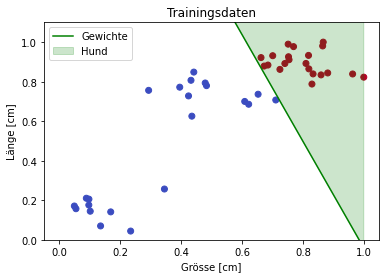

In [12]:
perzeptron = Perzeptron(100)
perzeptron.lernschritt(feature, labels)

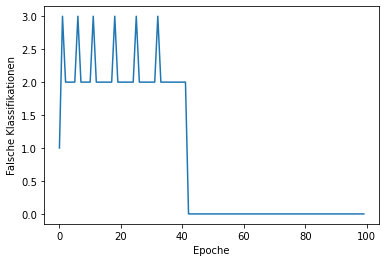

In [13]:
perzeptron.falsche_klassifikationen()

In [14]:
x_neu = [24.5, 13.8, 1]
if perzeptron.perzeptron(x_neu):
    print("Das ist ein Hund!")
else:
    print("Das ist kein Hund...")

Das ist kein Hund...
